In [1]:
from pprint import pprint
import csv
import statsmodels.api as sm
from collections import defaultdict 

In [149]:
!pip3 install statsmodels

  Using cached https://files.pythonhosted.org/packages/00/93/1b6882f92d94e491a3e3be101fc83934551eada261281980f3957246432f/statsmodels-0.12.0-cp36-cp36m-manylinux1_x86_64.whl
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 25.9MB 43kB/s eta 0:00:01  7% |██▍                             | 2.0MB 1.1MB/s eta 0:00:22
  Using cached https://files.pythonhosted.org/packages/ea/0c/5f61f1a3d4385d6bf83b83ea495068857ff8dfb89e74824c6e9eb63286d8/patsy-0.5.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b8/e5/a64ef44a85397ba3c377f6be9c02f3cb3e18023f8c89850dd319e7945521/numpy-1.19.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/1c/11/e1f53db0614f2721027aab297c8afd2eaf58d33d566441a97ea454541c5e/pandas-1.1.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a24774b3ff1c52d924a8a4cb04078a/six-1.15.0-py2.py3-none-an

In [2]:
f = open('input.csv', 'r')
rows = csv.DictReader(f)

In [3]:
params = [0.1,0.07,0.11,0.08]
def normalizeQValue(ph=7, temperature=30,turbidity=0):
    ph = float(ph)
    temperature = float(temperature)
    turbidity = float(turbidity)
    normalized_QValue_ph = 0
    if (ph >= 0 and ph < 2) or (ph > 12 and ph <= 14):
        normalized_QValue_ph = 0
    elif (ph >= 2 and ph < 3) or (ph > 11 and ph <= 12):
        normalized_QValue_ph = 2
    elif ph >= 3 and ph < 4:
        normalized_QValue_ph = 4
    elif ph >= 4 and ph < 5:
        normalized_QValue_ph = 8
    elif ph >= 4 and ph < 5:
        normalized_QValue_ph = 24
    elif ph >= 5 and ph < 6:
        normalized_QValue_ph = 55
    elif ph >= 6 and ph < 7:
        normalized_QValue_ph = 90
    elif ph >= 7 and ph < 7.2:
        normalized_QValue_ph = 92
    elif ph >= 7.2 and ph < 7.5:
        normalized_QValue_ph = 93
    elif ph >= 7.5 and ph < 7.7:
        normalized_QValue_ph = 90
    elif ph >= 7.7 and ph < 8:
        normalized_QValue_ph = 82
    elif ph >= 8 and ph < 8.5:
        normalized_QValue_ph = 67
    elif ph >= 8.5 and ph < 9:
        normalized_QValue_ph = 47
    elif ph >= 9 and ph < 10:
        normalized_QValue_ph = 19
    elif ph >= 10 and ph < 11:
        normalized_QValue_ph = 7

    normalized_QValue_temp = 0
    if temperature < -10:
        normalized_QValue_temp = 56
    elif temperature >= -10 and temperature < -7.5:
        normalized_QValue_temp = 63
    elif temperature >= -7.5 and temperature < -5:
        normalized_QValue_temp = 73
    elif temperature >= -5 and temperature < -2.5:
        normalized_QValue_temp = 85
    elif temperature >= -2.5 and temperature < -1:
        normalized_QValue_temp = 90
    elif temperature >= -1 and temperature < 0:
        normalized_QValue_temp = 93
    elif temperature >= 0 and temperature < 1:
        normalized_QValue_temp = 89
    elif temperature >= 1 and temperature < 2.5:
        normalized_QValue_temp = 85
    elif temperature >= 2.5 and temperature < 5:
        normalized_QValue_temp = 72
    elif temperature >= 5 and temperature < 7.5:
        normalized_QValue_temp = 57
    elif temperature >= 7.5 and temperature < 10:
        normalized_QValue_temp = 44
    elif temperature >= 10 and temperature < 12.5:
        normalized_QValue_temp = 36
    elif temperature >= 12.5 and temperature < 15:
        normalized_QValue_temp = 28
    elif temperature >= 15 and temperature < 17.5:
        normalized_QValue_temp = 23
    elif temperature >= 17.5 and temperature < 20:
        normalized_QValue_temp = 21
    elif temperature >= 20 and temperature < 22.5:
        normalized_QValue_temp = 18
    elif temperature >= 22.5 and temperature < 25:
        normalized_QValue_temp = 15
    elif temperature >= 25 and temperature < 27.5:
        normalized_QValue_temp = 12
    elif temperature >= 27.5 and temperature < 30:
        normalized_QValue_temp = 10

    normalized_QValue_turbidity = 0
    if turbidity < 0:
        normalized_QValue_turbidity = 97
    elif turbidity >= 0 and turbidity < 5:
        normalized_QValue_turbidity = 84
    elif turbidity >= 5 and turbidity < 10:
        normalized_QValue_turbidity = 76
    elif turbidity >= 10 and turbidity < 15:
        normalized_QValue_turbidity = 68
    elif turbidity >= 15 and turbidity < 20:
        normalized_QValue_turbidity = 62
    elif turbidity >= 20 and turbidity < 25:
        normalized_QValue_turbidity = 57
    elif turbidity >= 25 and turbidity < 30:
        normalized_QValue_turbidity = 53
    elif turbidity >= 30 and turbidity < 35:
        normalized_QValue_turbidity = 48
    elif turbidity >= 35 and turbidity < 40:
        normalized_QValue_turbidity = 45
    elif turbidity >= 40 and turbidity < 50:
        normalized_QValue_turbidity = 39
    elif turbidity >= 50 and turbidity < 60:
        normalized_QValue_turbidity = 34
    elif turbidity >= 60 and turbidity < 70:
        normalized_QValue_turbidity = 28
    elif turbidity >= 70 and turbidity < 80:
        normalized_QValue_turbidity = 25
    elif turbidity >= 80 and turbidity < 90:
        normalized_QValue_turbidity = 22
    elif turbidity >= 90 and turbidity < 100:
        normalized_QValue_turbidity = 17
    elif turbidity >= 100:
        normalized_QValue_turbidity = 5

    return [
        normalized_QValue_ph,
        normalized_QValue_temp,
        normalized_QValue_turbidity,
    ]

In [4]:
stationwise = defaultdict(lambda : [])
for row in rows:
    norm_vals = normalizeQValue(row['pH'], row['TEMP'], row['TURB'])
    stationwise[row['Station']].append([norm_vals[1], row['TDS'], norm_vals[0], norm_vals[2], row['WQI']])

In [123]:
# alpha denotes the decay rate
# num_neigh denote the number of previous observations we are going to consider

def weighted_decay(station, alpha, num_neigh):
    error = 0
    for i, entry in enumerate(stationwise[station]):
        
#       Getting the current WQI according to weights
       
        curr_wqi = 0
        for j, vals in enumerate(entry[:-1]):
            curr_wqi += float(vals) * params[j]
        curr_wqi = curr_wqi / sum(params)
        
#       Getting the WQI dependency on previous values
        
        m = num_neigh
        if num_neigh > i:
            m = i
        denm = (1 - pow(alpha, m))/(pow(alpha, m) * (1 - alpha))
        denm += 1
        num = 0
        for j in range(1, m+1):
            num += (1/pow(alpha,j)) * float(stationwise[station][i-j][4])
        predicted_wqi = (curr_wqi + num)/denm
#         print(predicted_wqi, entry[4])
        error += abs(predicted_wqi - float(entry[4]))
    return error/len(stationwise[station])
        
        
        

In [124]:
station_lists = []
for i in range(1, 10):
    station_lists.append("IND0000" + str(i))
for i in range(10, 71):
    station_lists.append("IND000" + str(i))
print(station_lists)

['IND00001', 'IND00002', 'IND00003', 'IND00004', 'IND00005', 'IND00006', 'IND00007', 'IND00008', 'IND00009', 'IND00010', 'IND00011', 'IND00012', 'IND00013', 'IND00014', 'IND00015', 'IND00016', 'IND00017', 'IND00018', 'IND00019', 'IND00020', 'IND00021', 'IND00022', 'IND00023', 'IND00024', 'IND00025', 'IND00026', 'IND00027', 'IND00028', 'IND00029', 'IND00030', 'IND00031', 'IND00032', 'IND00033', 'IND00034', 'IND00035', 'IND00036', 'IND00037', 'IND00038', 'IND00039', 'IND00040', 'IND00041', 'IND00042', 'IND00043', 'IND00044', 'IND00045', 'IND00046', 'IND00047', 'IND00048', 'IND00049', 'IND00050', 'IND00051', 'IND00052', 'IND00053', 'IND00054', 'IND00055', 'IND00056', 'IND00057', 'IND00058', 'IND00059', 'IND00060', 'IND00061', 'IND00062', 'IND00063', 'IND00064', 'IND00065', 'IND00066', 'IND00067', 'IND00068', 'IND00069', 'IND00070']


In [83]:
for station in station_lists:
    print(station, weighted_decay(station, 1.5, 4))

IND00001 5.207313012597196
IND00002 30.40859870779862
IND00003 14.434586535337898
IND00004 5.923344397556434
IND00005 5.70907745989032
IND00006 15.034902965557187
IND00007 37.28322060613087
IND00008 4.113981391752721
IND00009 12.386984344720888
IND00010 23.102075203232356
IND00011 9.214693554525892
IND00012 13.651835409939327
IND00013 7.724901555939682
IND00014 12.475524645097673
IND00015 6.595488460473521
IND00016 12.675917724796324
IND00017 4.446196945863756
IND00018 3.0176908114459087
IND00019 2.599579755186219
IND00020 3.2636268250556077
IND00021 53.92321679856176
IND00022 2.994276057936218
IND00023 8.907387092185942
IND00024 14.07479813117429
IND00025 6.962581139165474
IND00026 14.991009657169906
IND00027 40.14882293948507
IND00028 24.25547938613578
IND00029 12.335154314116904
IND00030 15.428073076185287
IND00031 3.1076489593700067
IND00032 4.528941752474535
IND00033 2.8345373243069822
IND00034 4.917353419464921
IND00035 2.534728295334839
IND00036 10.643634050434194
IND00037 16.96

In [125]:
rate = 1.01
while rate < 3.01:
    error = 0
    for station in station_lists:
        error += weighted_decay(station, rate, 10)
    print(rate, error)
    rate += 0.01

1.01 5518.7304250637235
1.02 5454.368562313996
1.03 5390.561285319343
1.04 5327.727969913442
1.05 5265.674441804648
1.06 5204.364026423476
1.07 5143.8537575883465
1.08 5084.279343636666
1.09 5025.641701725114
1.1 4967.934687596392
1.11 4911.1837143147795
1.12 4855.438569618787
1.1300000000000001 4800.713127195877
1.1400000000000001 4746.990075445559
1.1500000000000001 4694.310515653745
1.1600000000000001 4642.700456254591
1.1700000000000002 4592.109258794397
1.1800000000000002 4542.539141435363
1.1900000000000002 4494.040696895402
1.2000000000000002 4446.650219753041
1.2100000000000002 4400.2596121840215
1.2200000000000002 4354.865279738
1.2300000000000002 4310.455695129649
1.2400000000000002 4267.013872714094
1.2500000000000002 4224.541845630008
1.2600000000000002 4183.064092493696
1.2700000000000002 4142.651429153997
1.2800000000000002 4103.173284556237
1.2900000000000003 4064.613697117993
1.3000000000000003 4026.9454535920354
1.3100000000000003 3990.184431727479
1.3200000000000003 3

In [100]:
# alpha denotes the decay rate
# num_neigh denote the number of previous observations we are going to consider

def weighted_decay_train(station, alpha, num_neigh):
    error = 0
    for i, entry in enumerate(stationwise[station]):
        
#       Getting the WQI dependency on previous values
        if i == 0:
            continue
        m = num_neigh
        if num_neigh > i:
            m = i
        denm = ((1 - pow(alpha, m)) * alpha)/(pow(alpha, m) * (1 - alpha))
        num = 0
        for j in range(0, m):
            num += (1/pow(alpha,j)) * float(stationwise[station][i-j][4])
        predicted_wqi = num/denm
#         print(predicted_wqi, entry[4])
        error += abs(predicted_wqi - float(entry[4]))
    return error/len(stationwise[station])

In [102]:
weighted_decay_train("IND00004", 2, 4)

4.233904024097359

In [126]:
weighted_decay("IND00004", 2, 4)

13.534839894218356

In [106]:
rate = 1.01
ys= []
while rate < 3.01:
    error = 0
    for station in station_lists:
        error += weighted_decay_train(station, rate, 100)
    ys.append(error)
    rate += 0.01

In [107]:
print(ys)

[8231.708013081716, 7929.927150928855, 7638.495227418888, 7358.135009371662, 7089.5778796418135, 6836.1943986156675, 6598.711088991494, 6375.220872085651, 6165.369805770177, 5968.591580231216, 5785.311156338832, 5615.165884657641, 5456.902222413226, 5309.145578308681, 5170.279014365562, 5039.722962724593, 4916.915812289904, 4801.13108706512, 4691.950702183249, 4589.449731434953, 4492.304481178364, 4400.128291363095, 4312.455821230418, 4228.934620690552, 4149.323047693688, 4073.2750004563873, 4000.537965420106, 3930.889154524802, 3864.1216296411544, 3800.039366733047, 3738.4755137775855, 3679.282199897723, 3622.3171439268986, 3567.4212733548493, 3514.4394306697027, 3463.2784653955478, 3414.130152787221, 3366.5847267799195, 3320.5484156700627, 3275.9354425955516, 3232.682609671244, 3190.713828991219, 3149.970409994682, 3110.462914415788, 3072.100302107574, 3034.8034101965713, 2998.7785626205105, 2963.714262134408, 2929.5754406740953, 2896.322593717542, 2863.911783071693, 2832.30169423299

In [108]:
import matplotlib.pyplot as plt

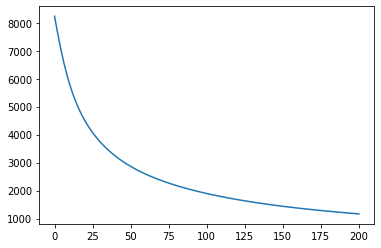

In [109]:
plt.plot(ys)

In [111]:
import csv
from collections import defaultdict

def weighted_decay_wqi(stationwise, station, alpha, num_neig):
    error = 0
    for i, entry in enumerate(stationwise[station]):
#       Getting the WQI dependency on previous values
        if i == 0:
            continue
        m = num_neigh
        if num_neigh > i:
            m = i
        denm = ((1 - pow(alpha, m)) * alpha)/(pow(alpha, m) * (1 - alpha))
        num = 0
        for j in range(0, m):
            num += (1/pow(alpha,j)) * float(stationwise[station][i-j][4])
        predicted_wqi = num/denm
        error += abs(predicted_wqi - float(entry[4]))
    return predicted_wqi

def findWQI(filename):
    f = open(filename, 'r')
    rows = csv.DictReader(f)
    stationwise = defaultdict(lambda : [])
    stations = set()
    for row in rows:
        stationwise[row['Station']].append([row['TEMP'], row['TDS'], row['pH'], row['TURB'], row['WQI']])
        stations.add(row['Station'])
    ans = dict()
    for station in stations:
        val = weighted_decay_wqi(station, 2.03, 25)
        ans[station] = val
    out_f = open("output.csv", "w")
    for station in stations:
        out_f.write(str(station) + "," + str(ans[station]) + "\n")
    out_f.close()

In [5]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [6]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [8]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])